In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
root = os.getcwd()
current_session = "session_15"

In [10]:
attendance = pd.read_csv(f"{root}/sessions/{current_session}/attendance_{current_session}.csv")
mp = pd.read_csv(f"{root}/sessions/{current_session}/mp_{current_session}.csv")

In [11]:
attendance.head(3)

,seat_code,seat,mp,2022-12-19,2022-12-20,2023-02-13,2023-02-14,2023-02-15,2023-02-16,2023-02-20,...,2023-03-21,2023-03-22,2023-03-23,2023-03-27,2023-03-28,2023-03-29,2023-03-30,2023-04-03,2023-04-04,total
0,P001,Padang Besar,RUSHDAN BIN RUSMI,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,33
1,P002,Kangar,ZAKRI BIN HASSAN,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,33
2,P003,Arau,SHAHIDAN BIN KASSIM,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,33


In [12]:
mp.head(3)

,seat_code,state,seat,mp,current_party
0,P001,Perlis,Padang Besar,RUSHDAN BIN RUSMI,PAS
1,P002,Perlis,Kangar,ZAKRI BIN HASSAN,BERSATU
2,P003,Perlis,Arau,SHAHIDAN BIN KASSIM,PAS


In [13]:
mp = mp.replace(["Parti Keadilan Rakyat", 'Parti Keadilan Rakyat (PKR)', "People's Justice Party (PKR)"], "PKR")
mp = mp.replace(['PPBM', 'Malaysian United Indigenous Party / Parti Pribumi Bersatu Malaysia (BERSATU)',
                'Malaysian United Indigenous Party (BERSATU) ', 'Parti Pribumi Bersatu Malaysia' ], "BERSATU")
mp = mp.replace(['Parti Islam Se-Malaysia (PAS)', 'PARTI ISLAM SE-MALAYSIA (PAS)', 'Malaysia Islamic Party (PAS)',
                'Parti Islam Se-Malaysia', 'Parti Islam Se-Malaysia'], "PAS")
mp = mp.replace(['Democratic Action Party', 'Democratic Action Party (DAP)'], "DAP")
mp = mp.replace('Malaysian United Democratic Alliance (MUDA)', "MUDA")
mp = mp.replace(['Parti Pesaka Bumiputera Bersatu (PPB)', 'Parti Pesaka Bumiputera Bersatu',
                'Parti Pesaka Bumiputera Bersatu (PBB)'], "PBB")
mp = mp.replace(['Parti Rakyat Sarawak',  'Parti Rakyat Sarawak (PRS)'], "PRS")
mp = mp.replace('Progressive Democratic Party (PDP)', "PDP")
mp = mp.replace(['Kesejahteraan Demokratik Masyarakat', 'Parti Kesejahteraan Demokratik Masyarakat'], "KDM")
mp = mp.replace("Parti Warisan Sabah", "WARISAN")

In [14]:
mp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   seat_code      222 non-null    object
 1   state          222 non-null    object
 2   seat           222 non-null    object
 3   mp             222 non-null    object
 4   current_party  222 non-null    object
dtypes: object(5)
memory usage: 8.8+ KB


In [49]:
#mp.to_csv(f'sessions/{current_session}/mp_{current_session}.csv',index=False)

In [15]:
# check if there is missing information on party
mp.loc[mp.isnull().any(axis=1)]

,seat_code,state,seat,mp,current_party


In [18]:
df = mp.drop(["seat_code", "state", "seat"], axis=1).merge(attendance, on="mp", how="inner")

In [19]:
#number of session
n_session = len(df.drop("total", axis=1).iloc[:, 4:].columns)

In [20]:
df["attendance_%"]=round((df["total"] / n_session * 100),2)

In [21]:
df.head(5)

,mp,current_party,seat_code,seat,2022-12-19,2022-12-20,2023-02-13,2023-02-14,2023-02-15,2023-02-16,...,2023-03-22,2023-03-23,2023-03-27,2023-03-28,2023-03-29,2023-03-30,2023-04-03,2023-04-04,total,attendance_%
0,RUSHDAN BIN RUSMI,PAS,P001,Padang Besar,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,33,100.00
1,ZAKRI BIN HASSAN,BERSATU,P002,Kangar,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,33,100.00
2,SHAHIDAN BIN KASSIM,PAS,P003,Arau,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,33,100.00
3,MOHD SUHAIMI BIN ABDULLAH,BERSATU,P004,Langkawi,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,33,100.00
4,ABDUL GHANI BIN AHMAD,PAS,P005,Jerlun,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,26,78.79


### Party analysis

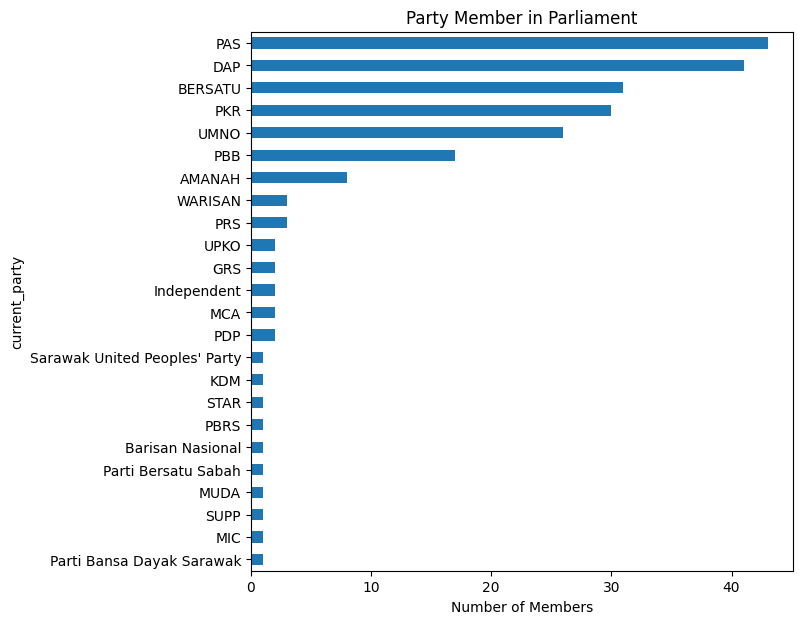

In [22]:
party_counts = df["current_party"].value_counts().sort_values()
ax = party_counts.plot(kind="barh", figsize=(7, 7))

# set the axis labels and title
ax.set_xlabel('Number of Members')
#ax.set_ylabel('Party')
ax.set_title('Party Member in Parliament')

plt.show()

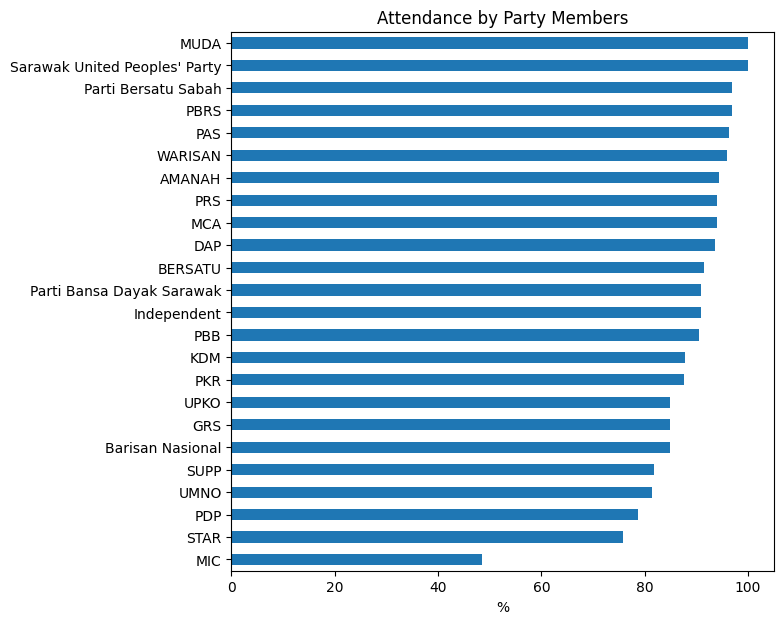

In [23]:
attendance_party = df[["current_party","attendance_%"]].groupby("current_party").mean().sort_values(by="attendance_%")
ax = attendance_party.plot(kind="barh", figsize=(7, 7),
                           legend=False)

# set the axis labels and title
ax.set_xlabel('%')
ax.set_ylabel('')
ax.set_title('Attendance by Party Members')
plt.show()

### Who are really commited? 

In [24]:
summary_df = df[["mp", "current_party", "seat_code", "seat", "total", "attendance_%"]]

In [25]:
# top 5 YB kaki ponteng
summary_df.sort_values(by="attendance_%").head(5)

,mp,current_party,seat_code,seat,total,attendance_%
172,SHAHELMEY BIN YAHYA,UMNO,P173,Putatan,12,36.36
214,ALEXANDER NANTA LINGGI,PBB,P215,Kapit,13,39.39
36,ABDUL HADI BIN AWANG,PAS,P037,Marang,14,42.42
71,SARAVANAN A/L MURUGAN,MIC,P072,Tapah,16,48.48
45,CHOW KON YEOW,DAP,P046,Batu Kawan,16,48.48


In [26]:
# top 5 YB rajin
summary_df.sort_values(by="attendance_%", ascending=False).head(5)

,mp,current_party,seat_code,seat,total,attendance_%
0,RUSHDAN BIN RUSMI,PAS,P001,Padang Besar,33,100.0
64,M. KULASEGARAN A/L V. MURUGESON,DAP,P065,Ipoh Barat,33,100.0
126,SHAMSULKAHAR BIN MOHD DELI,UMNO,P127,Jempol,33,100.0
124,MOHD RADZI BIN JIDIN,BERSATU,P125,Putrajaya,33,100.0
121,TERESA KOK SUH SIM,DAP,P122,Seputeh,33,100.0


In [27]:
year_df = attendance.drop(["seat_code", "seat", "total"], axis=1).set_index("mp").transpose()
year = []
for y in year_df.index:
    year.append(y[:4])
    
year_df["year"] = year

In [28]:
#get number of sessions per year
n_year = year_df["year"].value_counts()

In [29]:
year_df = year_df.set_index([year_df["year"], year_df.index])
year_df = year_df.drop("year", axis=1)

In [30]:
mp_year = year_df.groupby("year").sum().transpose()

In [31]:
n_year

year
2023    31
2022     2
Name: count, dtype: int64

In [32]:
mp_year["total"] = mp_year["2022"] + mp_year["2023"]
mp_year["2022_%"] = round((mp_year["2022"] / n_year[1] * 100), 2)
mp_year["2023_%"] = round((mp_year["2023"] / n_year[0] * 100), 2)
mp_year["total_%"]=round((mp_year["total"] / n_session * 100),2)

In [33]:
mp_year = mp_year.reset_index()
mp_year["current_party"] = mp["current_party"]
mp_year = mp_year.reindex(columns=["mp", "current_party"] + mp_year.columns.tolist()[1:-1])
mp_year.to_csv(f'sessions/{current_session}/summary_{current_session}.csv',index=False)

In [34]:
# who ponteng in 2023?
mp_year.sort_values(by="2023_%").head(5)

year,mp,current_party,2022,2023,total,2022_%,2023_%,total_%
172,SHAHELMEY BIN YAHYA,UMNO,2,10,12,100.0,32.26,36.36
214,ALEXANDER NANTA LINGGI,PBB,2,11,13,100.0,35.48,39.39
36,ABDUL HADI BIN AWANG,PAS,2,12,14,100.0,38.71,42.42
45,CHOW KON YEOW,DAP,2,14,16,100.0,45.16,48.48
71,SARAVANAN A/L MURUGAN,MIC,1,15,16,50.0,48.39,48.48


In [35]:
party_summary = mp_year[["current_party", "2022_%", 
                         "2023_%", "total_%"]].groupby("current_party").mean()

party_summary.sort_values(by="total_%", ascending=False)

year,2022_%,2023_%,total_%
current_party,,,
MUDA,100.000000,100.000000,100.000000
Sarawak United Peoples' Party,100.000000,100.000000,100.000000
PBRS,100.000000,96.770000,96.970000
Parti Bersatu Sabah,100.000000,96.770000,96.970000
PAS,100.000000,96.098837,96.335581
WARISAN,100.000000,95.700000,95.960000
AMANAH,100.000000,93.952500,94.318750
MCA,100.000000,93.550000,93.940000
PRS,100.000000,93.550000,93.940000
